__Madelon Data from UCI__

In [1]:
# Importing libraries

import urllib.request as urllib2
import numpy as np
import time

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt

In [2]:
# Importing the data set

train_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data'
val_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data'
train_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels'
val_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/madelon_valid.labels'
test_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_test.data'
# This data isn't standard csv so using numpy to load it as text
x_train = np.loadtxt(urllib2.urlopen(train_data_url))
y_train = np.loadtxt(urllib2.urlopen(train_resp_url))

x_val = np.loadtxt(urllib2.urlopen(val_data_url))
y_val = np.loadtxt(urllib2.urlopen(val_resp_url))

x_test = np.loadtxt(urllib2.urlopen(test_data_url))

In [3]:
# Feature Scaling

scl = StandardScaler()
X_train = scl.fit_transform(x_train)
X_val = scl.transform(x_val)
X_test = scl.transform(x_test)

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(500, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, sett

Runtime: 2.6155245304107666 seconds
Confusion matrix:
[[178 122]
 [132 168]]
Scores: [0.56  0.5   0.545 0.57  0.475 0.49  0.6   0.555 0.545 0.57 ]
Mean score: 0.541
Standart deviation of scores: 0.037934153476781314
Accuracy 0.5766666666666667
Accuracy: 0.54 (+/- 0.08)


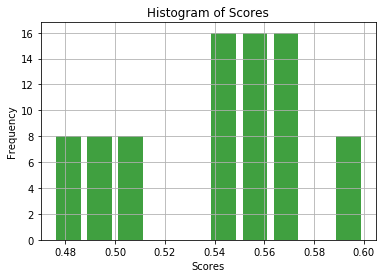

In [4]:
# Performing LDA

start_time = time.time()

lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_val)
y_pred_lda = lda.predict(X_val)


end_time = time.time()

# 10-Fold Cross-validation

scores = cross_val_score(lda, X_train, y_train, cv=10)

# Evaluation of the model’s performance

print('Runtime:', "%s seconds" % (time.time() - start_time))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_lda))
print('Scores:', scores)
print('Mean score:', scores.mean())
print('Standart deviation of scores:', scores.std()) 

n, bins, patches = plt.hist(scores, 10,  density=True, facecolor='g', alpha=0.75, rwidth=0.8)
plt.grid(True)
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
print("Accuracy", metrics.accuracy_score(y_val, y_pred_lda))
#The mean score and the 54% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Runtime: 321.2288143634796 seconds
Confusion matrix:
[[174 126]
 [126 174]]
Scores: [0.575 0.53  0.555 0.59  0.485 0.515 0.59  0.55  0.555 0.555]
Mean score: 0.55
Standart deviation of scores: 0.031224989991991983
Accuracy 0.58
Accuracy: 0.55 (+/- 0.06)


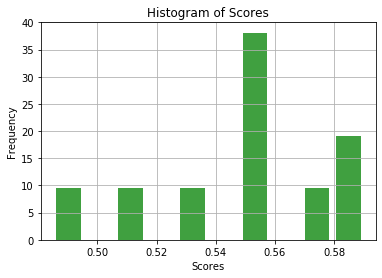

In [6]:
# Performing SVM linear kernel

start_time = time.time()

svc_linear = SVC(kernel = 'linear')   #kernel linear, rbf etc...
svc_linear.fit(X_train, y_train)
y_pred_svc_linear = svc_linear.predict(X_val)

end_time=time.time()

# 10-Fold Cross-validation

scores = cross_val_score(svc_linear, X_train, y_train, cv = 10)

# Evaluation of the model’s performance

print('Runtime:', "%s seconds" % (time.time()-start_time))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_svc_linear))
print('Scores:', scores)
print('Mean score:', scores.mean())
print('Standart deviation of scores:', scores.std()) 

n, bins, patches = plt.hist(scores, 10,  density=True, facecolor='g', alpha=0.75, rwidth=0.8)
plt.grid(True)
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
print("Accuracy", metrics.accuracy_score(y_val, y_pred_svc_linear))
#The mean score and the * confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Runtime: 26.978849411010742 seconds
Confusion matrix:
[[180 120]
 [131 169]]
Scores: [0.58  0.55  0.615 0.62  0.55  0.56  0.65  0.59  0.58  0.59 ]
Mean score: 0.5885
Standart deviation of scores: 0.030663496212923917
Accuracy 0.5816666666666667
Accuracy: 0.59 (+/- 0.06)


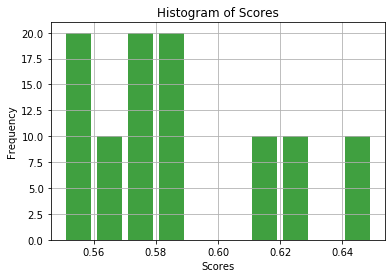

In [7]:
#Performing SVM RBF kernel

start_time = time.time()

svc_rbf = SVC(kernel = 'linear')   #kernel linear, rbf vs...
svc_rbf.fit(X_train, y_train)
y_pred_svc_rbf = svc_rbf.predict(X_val)

end_time = time.time()

# 10-Fold Cross-validation

scores = cross_val_score(svc_rbf, X_train, y_train, cv=10)

# Evaluation of the model’s performance

print('Runtime:', "%s seconds" % (time.time() - start_time))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_svc_rbf))
print('Scores:', scores)
print('Mean score:',scores.mean())
print('Standart deviation of scores:', scores.std()) 

n, bins, patches = plt.hist(scores, 10,  density=True, facecolor='g', alpha=0.75, rwidth=0.8)
plt.grid(True)
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
print("Accuracy", metrics.accuracy_score(y_val, y_pred_svc_rbf))
#The mean score and the * confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\damga\Anaconda1\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Runtime: 22.45540499687195 seconds
Confusion matrix:
[[254  46]
 [147 153]]
Scores: [0.58  0.55  0.615 0.62  0.55  0.56  0.65  0.59  0.58  0.59 ]
Mean score: 0.5885
Standart deviation of scores: 0.030663496212923917
Accuracy 0.6783333333333333
Accuracy: 0.59 (+/- 0.06)


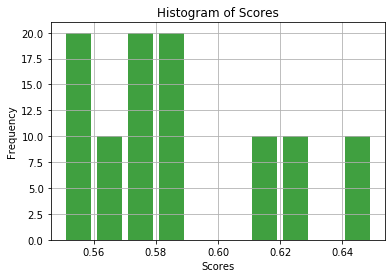

In [9]:
# Performing SVM after applying PCA 

start_time = time.time()

pca = PCA(n_components = 2, svd_solver = 'randomized',  whiten = True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
svc_rbf_pca = SVC(kernel='rbf')   #kernel linear, rbf vs...
svc_rbf_pca.fit(X_train_pca, y_train)
y_pred_svc_rbf_pca = svc_rbf_pca.predict(X_val_pca)

end_time = time.time()

# 10-Fold Cross-validation

scores = cross_val_score(svc_rbf_pca, X_train, y_train, cv=10)

# Evaluation of the model’s performance

print('Runtime:', "%s seconds" % (time.time() - start_time))
print('Confusion matrix:')
print(confusion_matrix(y_val, y_pred_svc_rbf_pca))
print('Scores:', scores)
print('Mean score:',scores.mean())
print('Standart deviation of scores:', scores.std()) 

n, bins, patches = plt.hist(scores, 10,  density=True, facecolor='g', alpha=0.75, rwidth=0.8)
plt.grid(True)
plt.title('Histogram of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
print("Accuracy", metrics.accuracy_score(y_val, y_pred_svc_rbf_pca))
#The mean score and the * confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))